Who are the top players in the NBA?

In [163]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
sns.set(rc={'figure.figsize':(15, 10)})
sns.set_style('darkgrid')

In [8]:
df = pd.read_csv('bball_stats.csv')
pd.set_option('display.max_columns', None)
df.head()

,name,slug,positions,age,team,games_played,games_started,minutes_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,free_throw_attempt_rate,offensive_rebound_percentage,defensive_rebound_percentage,total_rebound_percentage,assist_percentage,steal_percentage,block_percentage,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,is_combined_totals,season,points_off_threes,points_off_twos
0,Jeff Adrien,adrieje01,POWER FORWARD,24,GOLDEN STATE WARRIORS,23,0,196,23,54,0,0,11,19,23,35,10,4,5,9,28,57,11.3,0.457,0.000,0.352,13.0,20.7,16.8,7.3,1.0,1.9,12.6,16.1,0.1,0.1,0.2,0.051,-3.3,-2.0,-5.3,-0.2,False,2011,0,46
1,Arron Afflalo,afflaar01,SHOOTING GUARD,25,DENVER NUGGETS,69,69,2324,312,627,105,248,138,163,45,206,168,34,31,71,153,867,13.6,0.620,0.396,0.260,2.3,9.9,6.2,10.9,0.7,1.0,9.2,14.8,4.8,1.4,6.2,0.128,1.7,-0.3,1.4,2.0,False,2011,315,414
2,Maurice Ager,agerma01,SHOOTING GUARD,26,MINNESOTA TIMBERWOLVES,4,0,29,6,11,3,4,0,0,0,2,1,1,0,4,4,15,10.1,0.682,0.364,0.000,0.0,7.9,3.8,6.0,1.7,0.0,26.7,22.0,0.0,0.0,0.0,-0.015,-0.9,0.2,-0.7,0.0,False,2011,9,6
3,Alexis Ajinça,ajincal01,CENTER,22,DALLAS MAVERICKS,10,2,75,12,32,3,7,2,3,5,12,2,3,5,1,13,29,12.8,0.435,0.219,0.094,8.1,18.0,13.3,4.3,2.1,5.1,2.9,21.4,0.0,0.1,0.1,0.084,-3.4,0.5,-2.9,0.0,False,2011,9,18
4,Alexis Ajinça,ajincal01,CENTER,22,TORONTO RAPTORS,24,0,265,47,101,9,27,11,15,12,49,8,8,14,17,60,114,12.0,0.530,0.267,0.149,5.2,22.5,13.6,4.9,1.6,4.0,13.6,21.1,0.0,0.2,0.2,0.042,-3.8,-0.2,-4.1,-0.1,False,2011,27,76


In [9]:
df['rebounds'] = df.offensive_rebounds + df.defensive_rebounds
df.head()

,name,slug,positions,age,team,games_played,games_started,minutes_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,free_throw_attempt_rate,offensive_rebound_percentage,defensive_rebound_percentage,total_rebound_percentage,assist_percentage,steal_percentage,block_percentage,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,is_combined_totals,season,points_off_threes,points_off_twos,rebounds
0,Jeff Adrien,adrieje01,POWER FORWARD,24,GOLDEN STATE WARRIORS,23,0,196,23,54,0,0,11,19,23,35,10,4,5,9,28,57,11.3,0.457,0.000,0.352,13.0,20.7,16.8,7.3,1.0,1.9,12.6,16.1,0.1,0.1,0.2,0.051,-3.3,-2.0,-5.3,-0.2,False,2011,0,46,58
1,Arron Afflalo,afflaar01,SHOOTING GUARD,25,DENVER NUGGETS,69,69,2324,312,627,105,248,138,163,45,206,168,34,31,71,153,867,13.6,0.620,0.396,0.260,2.3,9.9,6.2,10.9,0.7,1.0,9.2,14.8,4.8,1.4,6.2,0.128,1.7,-0.3,1.4,2.0,False,2011,315,414,251
2,Maurice Ager,agerma01,SHOOTING GUARD,26,MINNESOTA TIMBERWOLVES,4,0,29,6,11,3,4,0,0,0,2,1,1,0,4,4,15,10.1,0.682,0.364,0.000,0.0,7.9,3.8,6.0,1.7,0.0,26.7,22.0,0.0,0.0,0.0,-0.015,-0.9,0.2,-0.7,0.0,False,2011,9,6,2
3,Alexis Ajinça,ajincal01,CENTER,22,DALLAS MAVERICKS,10,2,75,12,32,3,7,2,3,5,12,2,3,5,1,13,29,12.8,0.435,0.219,0.094,8.1,18.0,13.3,4.3,2.1,5.1,2.9,21.4,0.0,0.1,0.1,0.084,-3.4,0.5,-2.9,0.0,False,2011,9,18,17
4,Alexis Ajinça,ajincal01,CENTER,22,TORONTO RAPTORS,24,0,265,47,101,9,27,11,15,12,49,8,8,14,17,60,114,12.0,0.530,0.267,0.149,5.2,22.5,13.6,4.9,1.6,4.0,13.6,21.1,0.0,0.2,0.2,0.042,-3.8,-0.2,-4.1,-0.1,False,2011,27,76,61


In [10]:
main5_df = pd.DataFrame(df.groupby('name')['points', 'assists', 'rebounds', 'steals', 'blocks'].sum())

In [11]:
main5_points = main5_df.sort_values(by='points', ascending=False)
main5_assists = main5_df.sort_values(by='assists', ascending=False)
main5_rebounds = main5_df.sort_values(by='rebounds', ascending=False)
main5_steals = main5_df.sort_values(by='steals', ascending=False)
main5_blocks = main5_df.sort_values(by='blocks', ascending=False)

AxesSubplot(0.125,0.125;0.775x0.755)


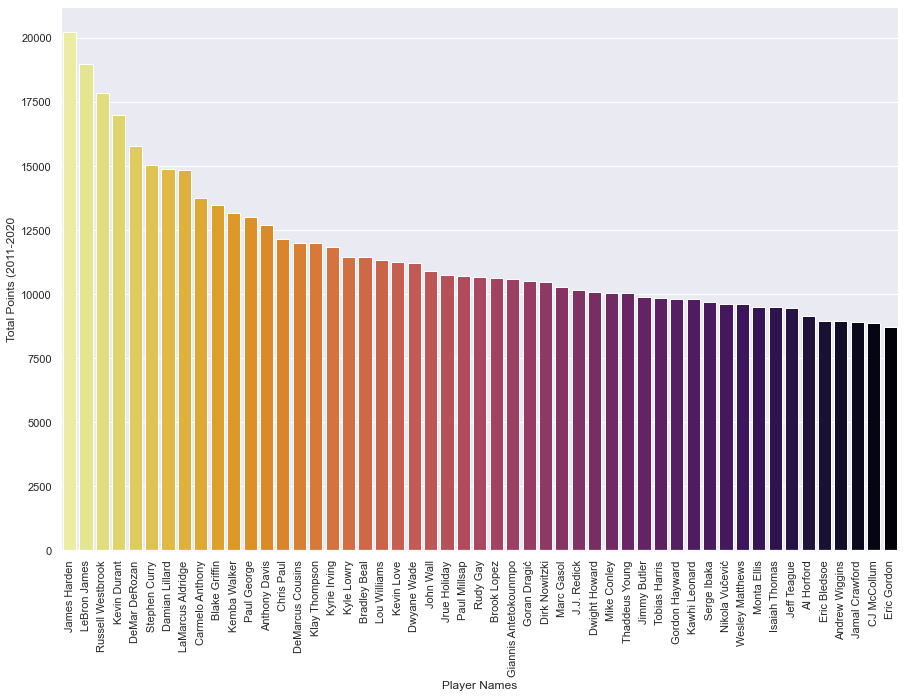

In [164]:
top50_points = main5_points[:51]
p1 = sns.barplot(x=top50_points.index, y=top50_points.points, palette='inferno_r')
p1.set_xticklabels(labels=top50_points.index, rotation=90)
p1.set(xlabel='Player Names', ylabel='Total Points (2011-2020')
print(p1)

In [13]:
df.head()

,name,slug,positions,age,team,games_played,games_started,minutes_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,free_throw_attempt_rate,offensive_rebound_percentage,defensive_rebound_percentage,total_rebound_percentage,assist_percentage,steal_percentage,block_percentage,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,is_combined_totals,season,points_off_threes,points_off_twos,rebounds
0,Jeff Adrien,adrieje01,POWER FORWARD,24,GOLDEN STATE WARRIORS,23,0,196,23,54,0,0,11,19,23,35,10,4,5,9,28,57,11.3,0.457,0.000,0.352,13.0,20.7,16.8,7.3,1.0,1.9,12.6,16.1,0.1,0.1,0.2,0.051,-3.3,-2.0,-5.3,-0.2,False,2011,0,46,58
1,Arron Afflalo,afflaar01,SHOOTING GUARD,25,DENVER NUGGETS,69,69,2324,312,627,105,248,138,163,45,206,168,34,31,71,153,867,13.6,0.620,0.396,0.260,2.3,9.9,6.2,10.9,0.7,1.0,9.2,14.8,4.8,1.4,6.2,0.128,1.7,-0.3,1.4,2.0,False,2011,315,414,251
2,Maurice Ager,agerma01,SHOOTING GUARD,26,MINNESOTA TIMBERWOLVES,4,0,29,6,11,3,4,0,0,0,2,1,1,0,4,4,15,10.1,0.682,0.364,0.000,0.0,7.9,3.8,6.0,1.7,0.0,26.7,22.0,0.0,0.0,0.0,-0.015,-0.9,0.2,-0.7,0.0,False,2011,9,6,2
3,Alexis Ajinça,ajincal01,CENTER,22,DALLAS MAVERICKS,10,2,75,12,32,3,7,2,3,5,12,2,3,5,1,13,29,12.8,0.435,0.219,0.094,8.1,18.0,13.3,4.3,2.1,5.1,2.9,21.4,0.0,0.1,0.1,0.084,-3.4,0.5,-2.9,0.0,False,2011,9,18,17
4,Alexis Ajinça,ajincal01,CENTER,22,TORONTO RAPTORS,24,0,265,47,101,9,27,11,15,12,49,8,8,14,17,60,114,12.0,0.530,0.267,0.149,5.2,22.5,13.6,4.9,1.6,4.0,13.6,21.1,0.0,0.2,0.2,0.042,-3.8,-0.2,-4.1,-0.1,False,2011,27,76,61


In [14]:
df['ppg'] = round(df.points / df.games_played, 2)
df['apg'] = round(df.assists / df.games_played, 2)
df['rpg'] = round(df.rebounds / df.games_played, 2)
df['spg'] = round(df.steals / df.games_played, 2)
df['bpg'] = round(df.blocks / df.games_played, 2)

In [15]:
df.head()

,name,slug,positions,age,team,games_played,games_started,minutes_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,free_throw_attempt_rate,offensive_rebound_percentage,defensive_rebound_percentage,total_rebound_percentage,assist_percentage,steal_percentage,block_percentage,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,is_combined_totals,season,points_off_threes,points_off_twos,rebounds,ppg,apg,rpg,spg,bpg
0,Jeff Adrien,adrieje01,POWER FORWARD,24,GOLDEN STATE WARRIORS,23,0,196,23,54,0,0,11,19,23,35,10,4,5,9,28,57,11.3,0.457,0.000,0.352,13.0,20.7,16.8,7.3,1.0,1.9,12.6,16.1,0.1,0.1,0.2,0.051,-3.3,-2.0,-5.3,-0.2,False,2011,0,46,58,2.48,0.43,2.52,0.17,0.22
1,Arron Afflalo,afflaar01,SHOOTING GUARD,25,DENVER NUGGETS,69,69,2324,312,627,105,248,138,163,45,206,168,34,31,71,153,867,13.6,0.620,0.396,0.260,2.3,9.9,6.2,10.9,0.7,1.0,9.2,14.8,4.8,1.4,6.2,0.128,1.7,-0.3,1.4,2.0,False,2011,315,414,251,12.57,2.43,3.64,0.49,0.45
2,Maurice Ager,agerma01,SHOOTING GUARD,26,MINNESOTA TIMBERWOLVES,4,0,29,6,11,3,4,0,0,0,2,1,1,0,4,4,15,10.1,0.682,0.364,0.000,0.0,7.9,3.8,6.0,1.7,0.0,26.7,22.0,0.0,0.0,0.0,-0.015,-0.9,0.2,-0.7,0.0,False,2011,9,6,2,3.75,0.25,0.50,0.25,0.00
3,Alexis Ajinça,ajincal01,CENTER,22,DALLAS MAVERICKS,10,2,75,12,32,3,7,2,3,5,12,2,3,5,1,13,29,12.8,0.435,0.219,0.094,8.1,18.0,13.3,4.3,2.1,5.1,2.9,21.4,0.0,0.1,0.1,0.084,-3.4,0.5,-2.9,0.0,False,2011,9,18,17,2.90,0.20,1.70,0.30,0.50
4,Alexis Ajinça,ajincal01,CENTER,22,TORONTO RAPTORS,24,0,265,47,101,9,27,11,15,12,49,8,8,14,17,60,114,12.0,0.530,0.267,0.149,5.2,22.5,13.6,4.9,1.6,4.0,13.6,21.1,0.0,0.2,0.2,0.042,-3.8,-0.2,-4.1,-0.1,False,2011,27,76,61,4.75,0.33,2.54,0.33,0.58


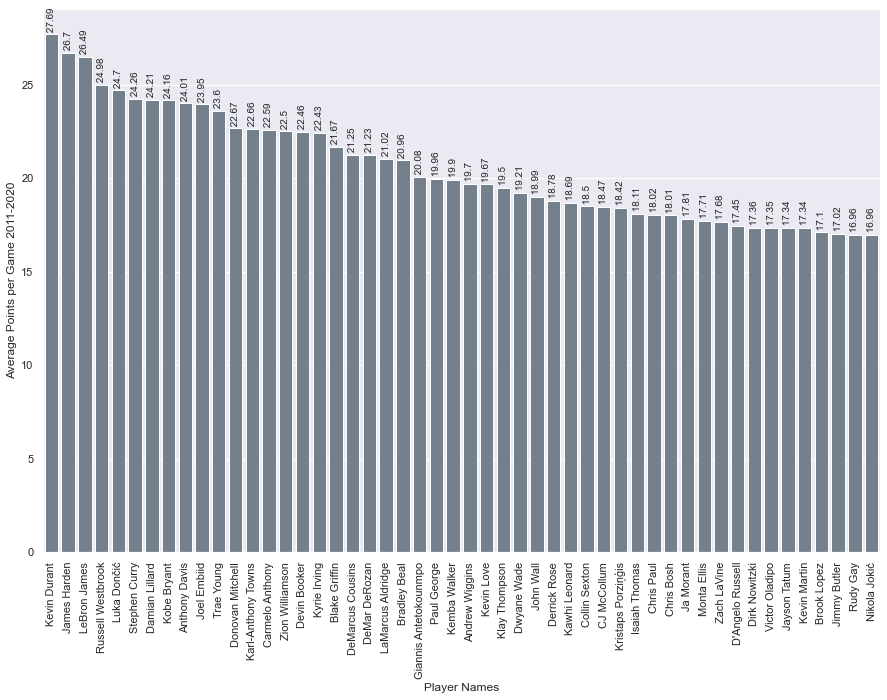

In [193]:
#plot ppg leaders over the 10 year span
ppg = df.groupby('name')['games_played', 'points'].sum().reset_index()
ppg['ppg'] = round(ppg.points / ppg.games_played, 2)
ppg = ppg.sort_values('ppg', ascending=False)

#test2[:20].plot.bar(x='name', y='ppg')
p2 = sns.barplot(x=ppg[:50].name, y=ppg[:50].ppg, color='slategrey')
p2.set_xticklabels(labels=ppg[:50].name, rotation=90)
p2.set(xlabel='Player Names', ylabel='Average Points per Game 2011-2020')

for index, value in ppg[:50].reset_index().iterrows():
        p2.text(value.name, value.ppg, f' {str(value.ppg)}', size='small', ha='center', va='bottom', rotation=90)

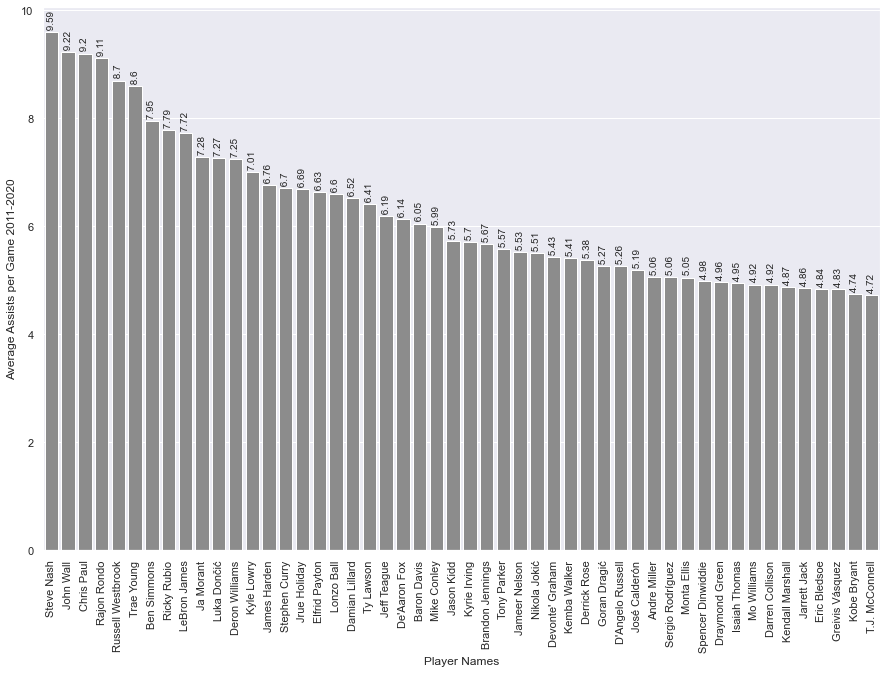

In [189]:
apg = df.groupby('name')['games_played', 'assists'].sum().reset_index()
apg['apg'] = round(apg.assists / apg.games_played, 2)
apg = apg.sort_values('apg', ascending=False)

p3 = sns.barplot(x=apg.name[:50], y=apg.apg[:50], color = 'C7')
p3.set_xticklabels(labels=apg.name[:50], rotation=90)
p3.set(xlabel='Player Names', ylabel='Average Assists per Game 2011-2020')

for index, value in apg[:50].reset_index().iterrows():
        p3.text(value.name, value.apg, f' {str(value.apg)}', size='small', ha='center', va='bottom', rotation=90)

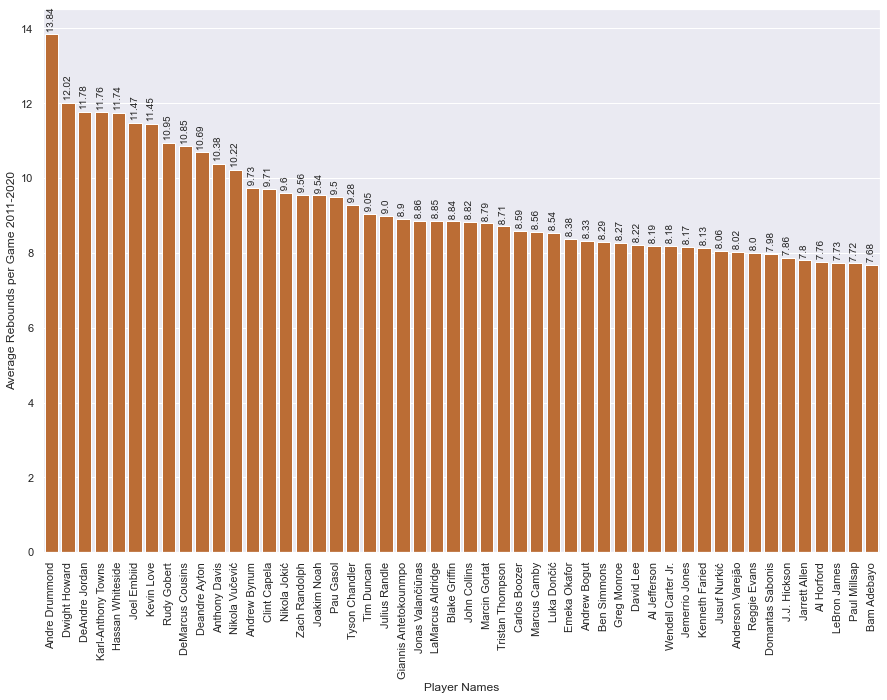

In [195]:
rpg = df.groupby('name')['games_played', 'rebounds'].sum().reset_index()
rpg['rpg'] = round(rpg.rebounds / rpg.games_played, 2)
rpg = rpg.sort_values('rpg', ascending=False)

p4 = sns.barplot(x=rpg.name[:50], y=rpg.rpg[:50], color='chocolate')
p4.set_xticklabels(labels=rpg.name[:50], rotation=90)
p4.set(xlabel='Player Names', ylabel='Average Rebounds per Game 2011-2020')

for index, value in rpg[:50].reset_index().iterrows():
        p4.text(value.name, value.rpg, f' {str(value.rpg)}', size='small', ha='center', va='bottom', rotation=90)

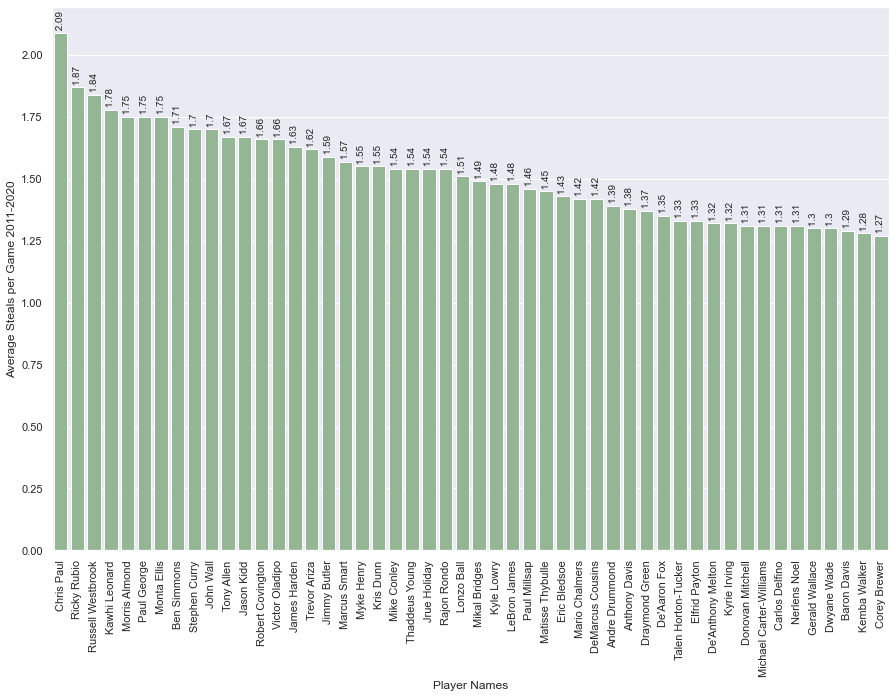

In [204]:
spg = df.groupby('name')['games_played', 'steals'].sum().reset_index()
spg['spg'] = round(spg.steals / spg.games_played, 2)
spg = spg.sort_values('spg', ascending=False)

p5 = sns.barplot(x=spg.name[:50], y=spg.spg[:50], color='darkseagreen')
p5.set_xticklabels(labels=spg.name[:50], rotation=90)
p5.set(xlabel='Player Names', ylabel='Average Steals per Game 2011-2020')

for index, value in spg[:50].reset_index().iterrows():
        p5.text(value.name, value.spg, f' {str(value.spg)}', size='small', ha='center', va='bottom', rotation=90)

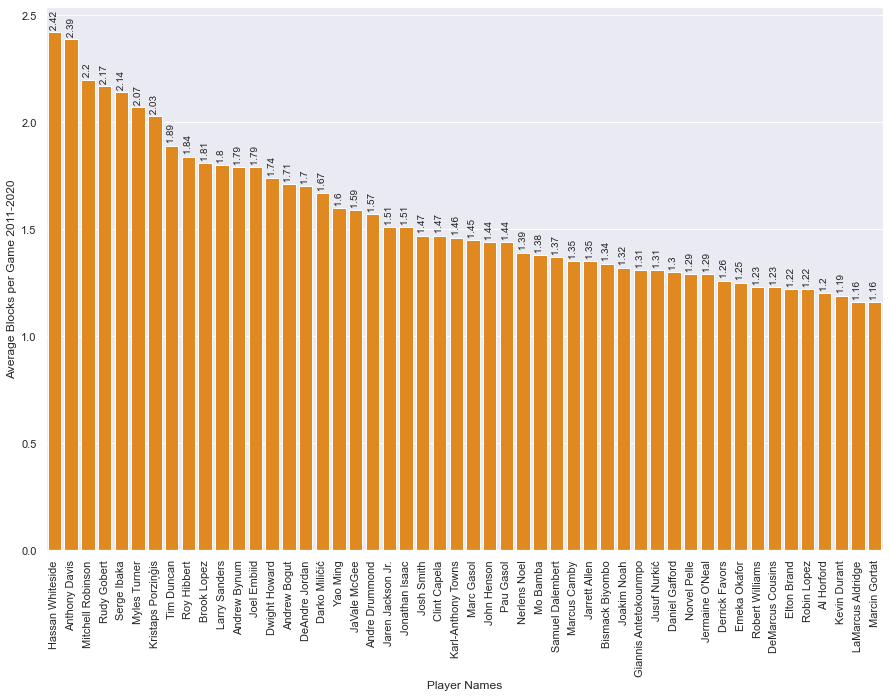

In [203]:
bpg = df.groupby('name')['games_played', 'blocks'].sum().reset_index()
bpg['bpg'] = round(bpg.blocks / bpg.games_played, 2)
bpg = bpg.sort_values('bpg', ascending=False)

p6 = sns.barplot(x=bpg.name[:50], y=bpg.bpg[:50], color='darkorange')
p6.set_xticklabels(labels=bpg.name[:50], rotation=90)
p6.set(xlabel='Player Names', ylabel='Average Blocks per Game 2011-2020')

for index, value in bpg[:50].reset_index().iterrows():
        p6.text(value.name, value.bpg, f' {str(value.bpg)}', size='small', ha='center', va='bottom', rotation=90)

Counting Player Appearences in the Top 50

1    94
2    48
3    16
4     3
Name: name, dtype: int64

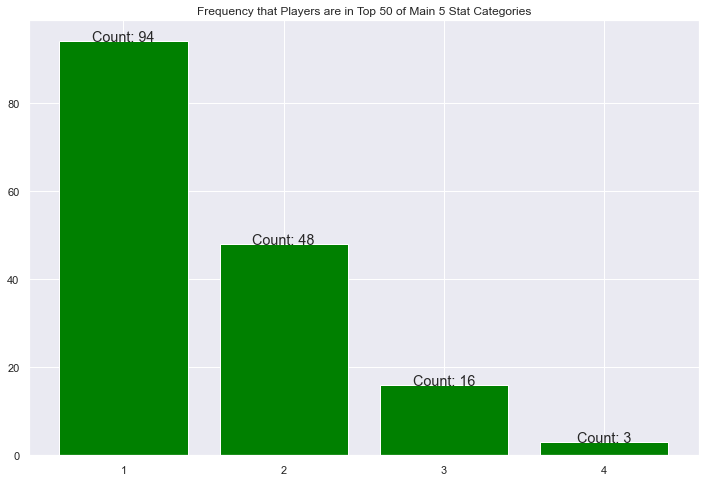

In [98]:
stat_list = [ppg, apg, rpg, spg, bpg]
overall = pd.DataFrame()
for stat in stat_list:
    to_add = stat.name[:50].reset_index()
    overall = overall.append(to_add)
test = overall['name'].value_counts().value_counts()


plt.bar(test.index, test.values, color='Green')
plt.xticks(ticks=range(1, 5), labels=test.index)
plt.title('Frequency that Players are in Top 50 of Main 5 Stat Categories')
for index, value in enumerate(test):
     plt.text(index+1, value, f'Count: {str(value)}', size='large', ha='center', va='baseline')

test

In [22]:
#Try adjusting the list to factor in minutes played - need to first determine a number threshold 
# Or maybe it should be for games played - Needs to have played at least five years? Eliminate 1 year anomalies
df_summed_seasons = df.groupby(['name', 'season']).sum().reset_index()
df_summed = df_summed_seasons.groupby('name')
five_seasons_plus = pd.DataFrame(df_summed.name.count())
five_seasons_plus = five_seasons_plus.loc[five_seasons_plus.name >= 5]
fsp = five_seasons_plus.index.tolist()



In [23]:
df_summed_seasons = df_summed_seasons.set_index('name')

In [24]:
df_summed_seasons

,season,age,games_played,games_started,minutes_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,free_throw_attempt_rate,offensive_rebound_percentage,defensive_rebound_percentage,total_rebound_percentage,assist_percentage,steal_percentage,block_percentage,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,is_combined_totals,points_off_threes,points_off_twos,rebounds,ppg,apg,rpg,spg,bpg
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A.J. Hammons,2017,24,22,0,163,17,42,5,10,9,20,8,28,4,1,13,10,21,48,8.4,0.472,0.238,0.476,5.4,21.0,12.8,3.8,0.3,7.2,16.4,17.6,-0.2,0.2,0.0,-0.001,-6.6,0.0,-6.6,-0.2,False,15,24,36,2.18,0.18,1.64,0.05,0.59
A.J. Price,2011,24,50,0,795,114,320,41,149,54,81,16,56,111,29,1,53,61,323,10.7,0.454,0.466,0.253,2.3,7.8,5.0,22.7,1.8,0.1,13.0,22.7,-0.4,0.7,0.3,0.020,-1.9,-1.1,-2.9,-0.2,False,123,146,72,6.46,2.22,1.44,0.58,0.02
A.J. Price,2012,25,44,1,568,59,174,26,88,28,35,13,48,86,20,2,32,30,172,11.5,0.454,0.506,0.201,2.6,9.4,6.0,23.9,1.9,0.3,14.5,17.7,0.2,0.5,0.7,0.063,-0.6,-0.5,-1.0,0.1,False,78,66,61,3.91,1.95,1.39,0.45,0.05
A.J. Price,2013,26,57,22,1278,161,413,70,200,49,62,20,94,205,33,3,64,73,441,12.4,0.501,0.484,0.150,1.7,8.2,4.9,26.4,1.3,0.2,12.7,18.0,1.0,1.2,2.2,0.084,-0.2,-0.4,-0.6,0.5,False,210,182,114,7.74,3.60,2.00,0.58,0.05
A.J. Price,2014,27,28,0,99,19,46,6,22,0,2,1,9,13,1,0,7,5,44,9.7,0.469,0.478,0.043,1.1,10.2,5.5,21.5,0.5,0.0,13.0,23.2,-0.1,0.0,0.0,-0.012,-2.4,-2.4,-4.8,-0.1,False,18,26,10,1.57,0.46,0.36,0.04,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ömer Aşık,2014,27,48,19,968,101,190,0,0,78,126,101,277,25,14,37,59,92,280,14.0,0.570,0.000,0.663,12.3,30.1,21.7,3.8,0.7,2.8,19.4,13.8,1.0,1.5,2.4,0.121,-1.2,-0.3,-1.5,0.1,False,0,202,378,5.83,0.52,7.88,0.29,0.77
Ömer Aşık,2015,28,76,76,1982,213,412,0,0,131,225,244,504,72,29,54,95,144,557,15.5,0.545,0.000,0.546,14.0,28.8,21.4,5.4,0.8,2.1,15.7,14.0,2.8,2.2,5.0,0.120,-0.4,-0.9,-1.2,0.4,False,0,426,748,7.33,0.95,9.84,0.38,0.71
Ömer Aşık,2016,29,68,64,1178,104,195,0,0,61,112,120,294,26,21,23,60,124,269,11.0,0.551,0.000,0.574,10.9,28.7,19.5,3.1,0.9,1.6,19.7,11.4,0.7,1.0,1.7,0.070,-2.8,-1.0,-3.8,-0.5,False,0,208,414,3.96,0.38,6.09,0.31,0.34


In [25]:
df_fsp = df_summed_seasons.loc[fsp]

In [26]:
df_fsp['ppg'] = round(df_fsp.points / df_fsp.games_played, 2)
df_fsp['apg'] = round(df_fsp.assists / df_fsp.games_played, 2)
df_fsp['rpg'] = round(df_fsp.rebounds / df_fsp.games_played, 2)
df_fsp['spg'] = round(df_fsp.steals / df_fsp.games_played, 2)
df_fsp['bpg'] = round(df_fsp.blocks / df_fsp.games_played, 2)

In [27]:
df_fsp.loc['Devin Booker']

,season,age,games_played,games_started,minutes_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,free_throw_attempt_rate,offensive_rebound_percentage,defensive_rebound_percentage,total_rebound_percentage,assist_percentage,steal_percentage,block_percentage,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,is_combined_totals,points_off_threes,points_off_twos,rebounds,ppg,apg,rpg,spg,bpg
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Devin Booker,2016,19,76,51,2108,367,867,99,289,215,256,27,160,200,44,20,160,225,1048,11.9,0.535,0.333,0.295,1.4,8.4,4.8,15.8,1.0,0.8,14.0,23.0,1.2,0.7,1.9,0.043,-1.2,-1.7,-2.8,-0.5,False,297,536,187,13.79,2.63,2.46,0.58,0.26
Devin Booker,2017,20,78,78,2730,606,1431,147,405,367,441,46,203,268,72,21,241,242,1726,14.6,0.531,0.283,0.308,1.8,8.3,5.0,16.3,1.3,0.6,12.9,28.6,1.3,0.6,2.0,0.035,0.3,-2.3,-1.9,0.1,False,441,918,249,22.13,3.44,3.19,0.92,0.27
Devin Booker,2018,21,54,54,1865,455,1054,147,384,289,329,26,218,253,47,14,194,168,1346,18.1,0.561,0.364,0.312,1.5,12.7,7.0,24.4,1.2,0.6,13.9,31.7,1.9,0.6,2.4,0.063,2.9,-2.0,0.9,1.4,False,441,616,244,24.93,4.69,4.52,0.87,0.26
Devin Booker,2019,22,64,64,2242,586,1255,135,414,393,454,39,226,433,56,13,264,200,1700,20.2,0.584,0.330,0.362,1.9,11.3,6.5,34.1,1.2,0.5,15.4,32.9,3.3,0.3,3.5,0.076,3.3,-2.3,1.0,1.7,False,405,902,265,26.56,6.77,4.14,0.88,0.20
Devin Booker,2020,23,70,70,2512,627,1283,141,398,468,509,29,268,456,49,18,264,213,1863,20.6,0.618,0.310,0.397,1.3,12.0,6.6,30.0,0.9,0.6,14.9,30.0,6.0,1.5,7.5,0.143,3.4,-1.3,2.2,2.6,False,423,972,297,26.61,6.51,4.24,0.70,0.26


[Text(0, 0.5, 'Average Points per Game 2011-2020'),
 Text(0.5, 0, 'Player Names')]

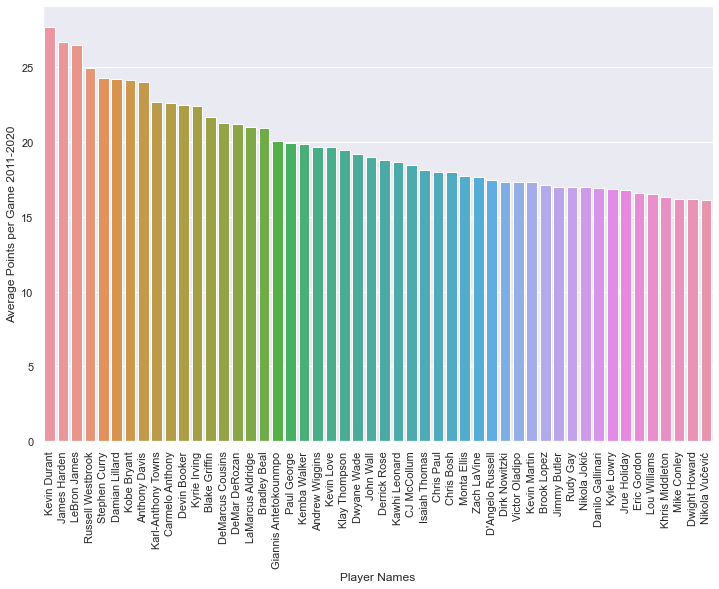

In [57]:
#plot ppg leaders over the 10 year span
ppg_fsp = df_fsp.groupby('name')['games_played', 'points'].sum().reset_index()
ppg_fsp['ppg'] = round(ppg_fsp.points / ppg_fsp.games_played, 2)
ppg_fsp = ppg_fsp.sort_values('ppg', ascending=False)

#test2[:20].plot.bar(x='name', y='ppg')
p7 = sns.barplot(x=ppg_fsp[:50].name, y=ppg_fsp[:50].ppg)
p7.set_xticklabels(labels=ppg_fsp[:50].name, rotation=90)
p7.set(xlabel='Player Names', ylabel='Average Points per Game 2011-2020')

[Text(0, 0.5, 'Average Assists per Game 2011-2020'),
 Text(0.5, 0, 'Player Names')]

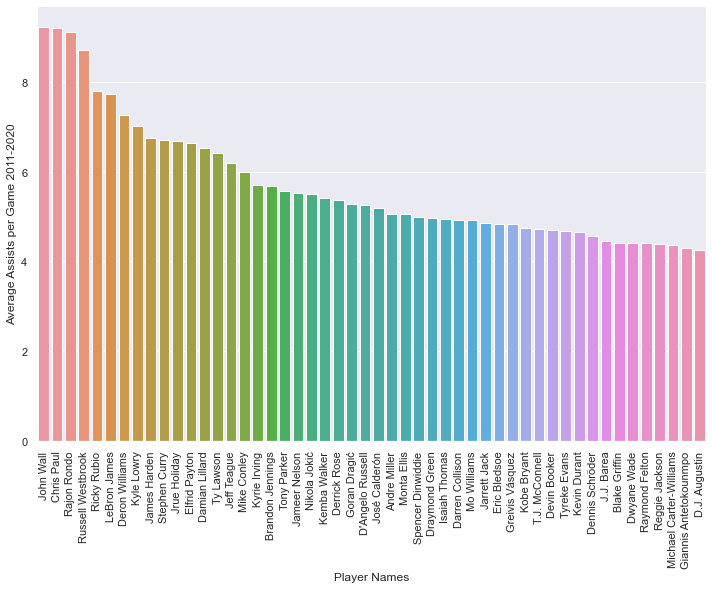

In [58]:
apg_fsp = df_fsp.groupby('name')['games_played', 'assists'].sum().reset_index()
apg_fsp['apg'] = round(apg_fsp.assists / apg_fsp.games_played, 2)
apg_fsp = apg_fsp.sort_values('apg', ascending=False)

p8 = sns.barplot(x=apg_fsp.name[:50], y=apg_fsp.apg[:50])
p8.set_xticklabels(labels=apg_fsp.name[:50], rotation=90)
p8.set(xlabel='Player Names', ylabel='Average Assists per Game 2011-2020')

[Text(0, 0.5, 'Average Rebounds per Game 2011-2020'),
 Text(0.5, 0, 'Player Names')]

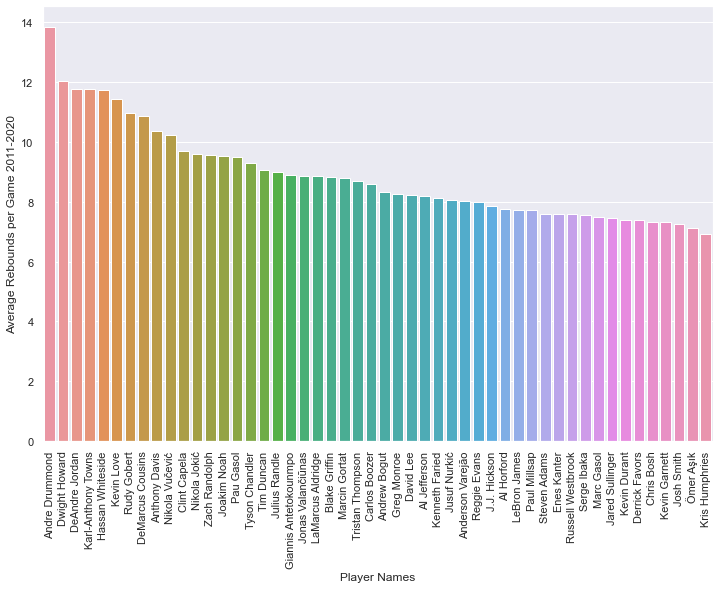

In [59]:
rpg_fsp = df_fsp.groupby('name')['games_played', 'rebounds'].sum().reset_index()
rpg_fsp['rpg'] = round(rpg_fsp.rebounds / rpg_fsp.games_played, 2)
rpg_fsp = rpg_fsp.sort_values('rpg', ascending=False)

p9 = sns.barplot(x=rpg_fsp.name[:50], y=rpg_fsp.rpg[:50])
p9.set_xticklabels(labels=rpg_fsp.name[:50], rotation=90)
p9.set(xlabel='Player Names', ylabel='Average Rebounds per Game 2011-2020')

[Text(0, 0.5, 'Average Steals per Game 2011-2020'),
 Text(0.5, 0, 'Player Names')]

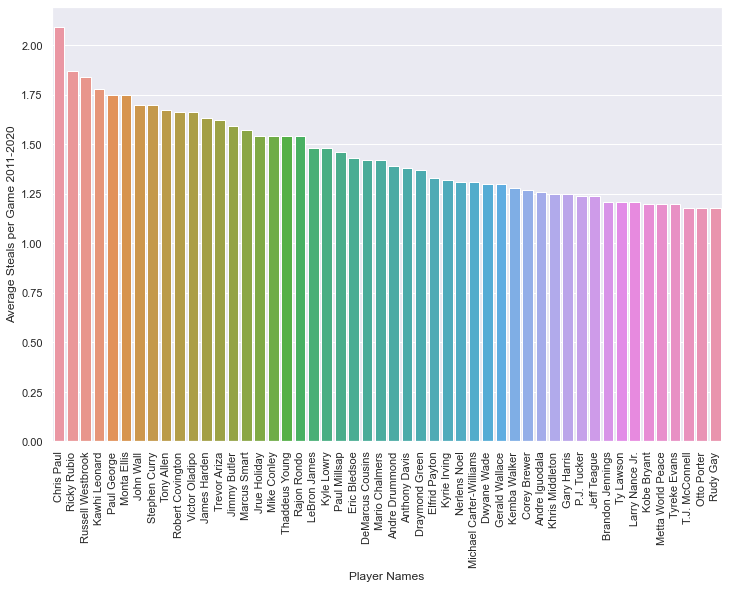

In [60]:
spg_fsp = df_fsp.groupby('name')['games_played', 'steals'].sum().reset_index()
spg_fsp['spg'] = round(spg_fsp.steals / spg_fsp.games_played, 2)
spg_fsp = spg_fsp.sort_values('spg', ascending=False)

p10 = sns.barplot(x=spg_fsp.name[:50], y=spg_fsp.spg[:50])
p10.set_xticklabels(labels=spg_fsp.name[:50], rotation=90)
p10.set(xlabel='Player Names', ylabel='Average Steals per Game 2011-2020')

[Text(0, 0.5, 'Average Blocks per Game 2011-2020'),
 Text(0.5, 0, 'Player Names')]

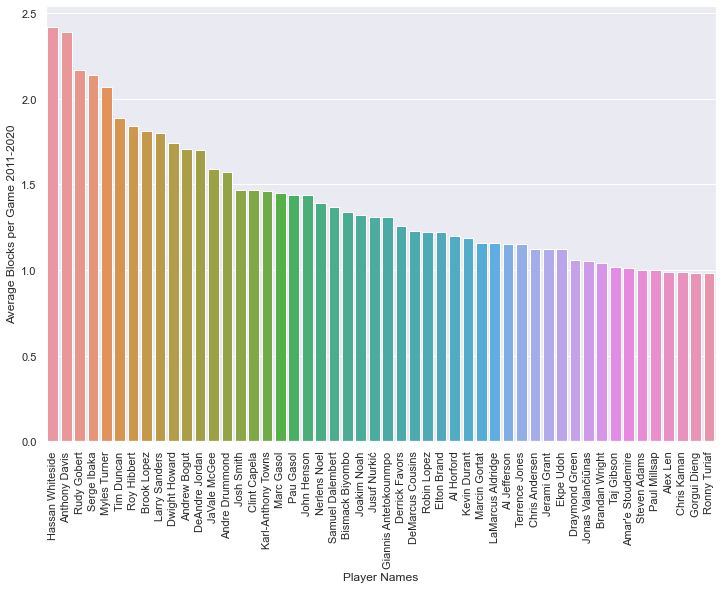

In [61]:
bpg_fsp = df_fsp.groupby('name')['games_played', 'blocks'].sum().reset_index()
bpg_fsp['bpg'] = round(bpg_fsp.blocks / bpg_fsp.games_played, 2)
bpg_fsp = bpg_fsp.sort_values('bpg', ascending=False)

p11 = sns.barplot(x=bpg_fsp.name[:50], y=bpg_fsp.bpg[:50])
p11.set_xticklabels(labels=bpg_fsp.name[:50], rotation=90)
p11.set(xlabel='Player Names', ylabel='Average Blocks per Game 2011-2020')

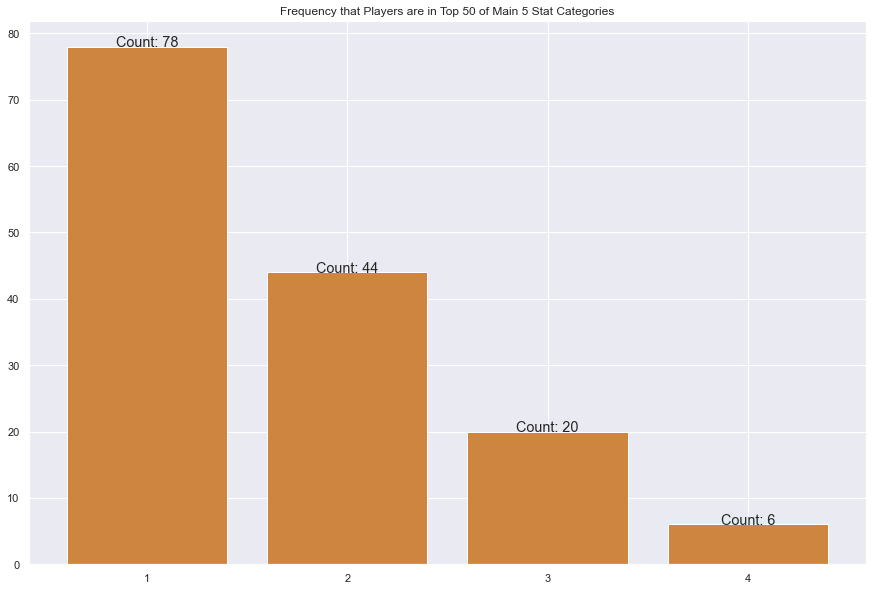

In [226]:
stat_list_fsp = [ppg_fsp, apg_fsp, rpg_fsp, spg_fsp, bpg_fsp]
overall_fsp = pd.DataFrame()
for stat in stat_list_fsp:
    to_add = stat.name[:50].reset_index()
    overall_fsp = overall_fsp.append(to_add)
w
overall_freq = overall_fsp.name.value_counts().value_counts()

plt.bar(overall_freq.index, overall_freq.values, color='peru')
plt.xticks(ticks=range(1, 5), labels=overall_freq.index)
plt.title('Frequency that Players are in Top 50 of Main 5 Stat Categories')

for index, value in enumerate(overall_freq):
     plt.text(index+1, value, f'Count: {str(value)}', size='large', ha='center', va='baseline')

[Text(0, 0.5, 'Average Points per Game 2011-2020'),
 Text(0.5, 0, 'Player Names')]

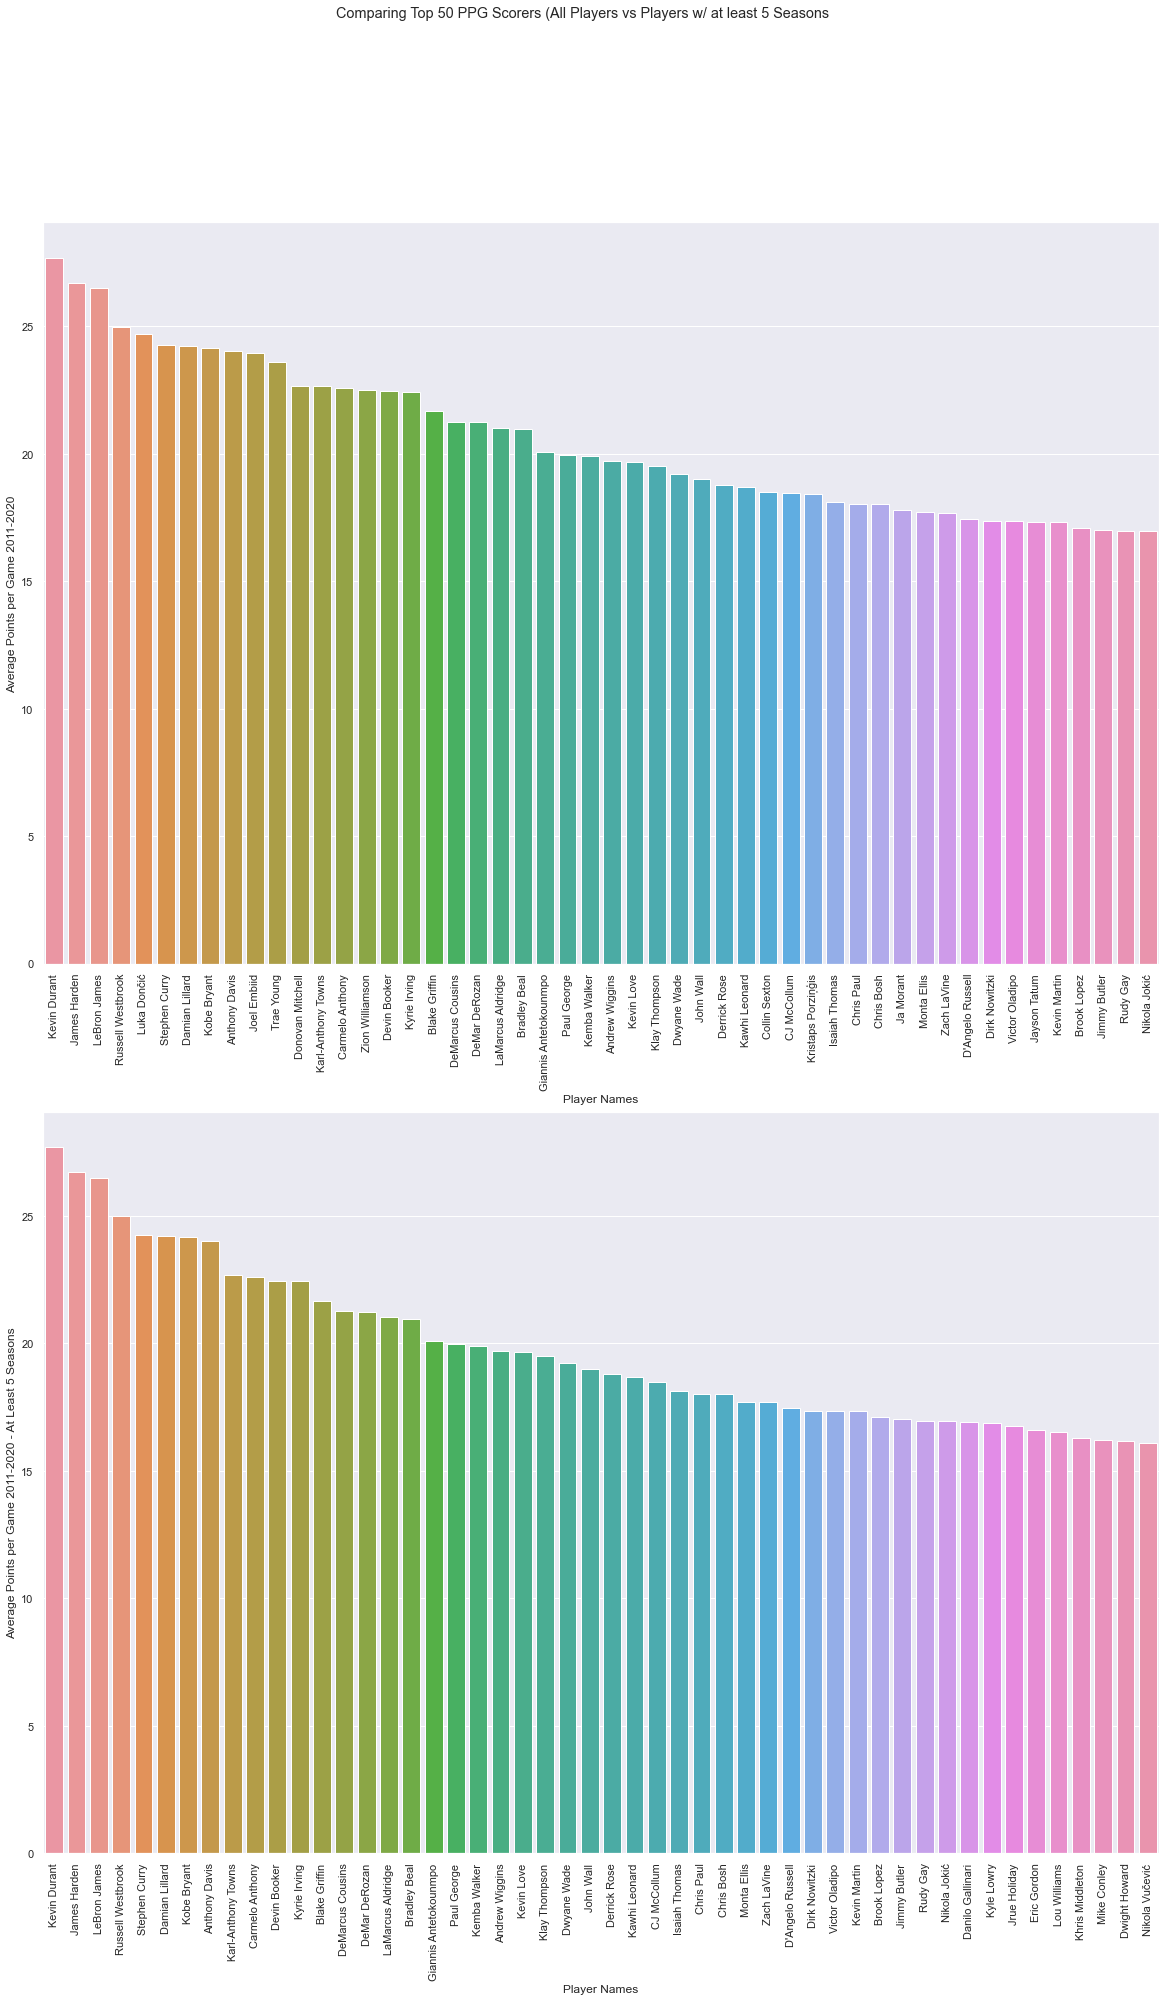

In [56]:
fig, axes = plt.subplots(2, 1, figsize=(20, 30))

fig.suptitle('Comparing Top 50 PPG Scorers (All Players vs Players w/ at least 5 Seasons')

p7 = sns.barplot(x=ppg_fsp[:50].name, y=ppg_fsp[:50].ppg, ax=axes[1])
p7.set_xticklabels(labels=ppg_fsp[:50].name, rotation=90)
p7.set(xlabel='Player Names', ylabel='Average Points per Game 2011-2020 - At Least 5 Seasons')

p2 = sns.barplot(x=ppg[:50].name, y=ppg[:50].ppg, ax=axes[0])
p2.set_xticklabels(labels=ppg[:50].name, rotation=90)
p2.set(xlabel='Player Names', ylabel='Average Points per Game 2011-2020')